# Redes Neuronales Convolucionales

## 1. Objetivos y Perspectiva General.

Las redes neuronales convolucionales, también denominadas convolutional neural networks (CNNs), han revolucionado el campo de la visión por computadora, desde la clasificación de imágenes hasta la detección de objetos. En este artículo, abordaremos un análisis práctico de este tipo de redes neuronales, el cuál le permitirá al lector entender su funcionamiento y aplicarlas en proyectos reales.

Para ello, ulizaremos el _dataset_ de [KMNIST](https://github.com/rois-codh/kmnist/blob/master/README.md), compuesto por 10 caracteres kanji del hiragana japonés. Nuestro objetivo será diseñar una red neuronal convolucional (CNN) capaz de clasificar con precisión estos kanjis, desarrollando un modelo de aprendizaje supervisado dentro del ámbito del Machine Learning.

![kanji](http://codh.rois.ac.jp/img/kmnist.png)

¡Comenzamos!

## 2. Importación de paquetes y librerías.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.metrics import confusion_matrix
from keras import layers, models
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore") 

## 3. Carga y generación de datos.

Iniciamos el análisis cargando y dividiendo el dataset en dos conjuntos: _train_ para entrenar el modelo y _test_ para evaluar su rendimiento. Esto nos permitirá validar la precisión del modelo una vez finalizado el proceso de entrenamiento.

In [2]:
train_images, test_images = np.load("datasets\kmnist\kmnist-train-imgs.npz")['arr_0'], np.load("datasets\kmnist\kmnist-test-imgs.npz")['arr_0'] 
train_labels, test_labels = np.load("datasets\kmnist\kmnist-train-labels.npz")['arr_0'], np.load("datasets\kmnist\kmnist-test-labels.npz")['arr_0']

A continuación, analizamos a qué corresponde cada valor de las etiquetas (labels). El primer valor se relaciona con los números presentes en `train_labels` y `test_labels`, mientras que en `labels_kanji` y `label_read` se encuentran, respectivamente, el kanji asociado y su nombre."

In [3]:
with open('datasets\kmnist\kmnist_classmap.csv', encoding="utf8", mode='r') as infile:
    reader = csv.reader(infile)
    labels_kanjis = {}
    labels_read = {}
    for row in reader:
        labels_kanjis[row[0]] = row[2]
        labels_read[row[0]] = row[3] 

Printeamos las dimensiones del conjunto de datos de entrenamiento para posteriormente tomar deciones.

In [4]:
train_images.shape

(60000, 28, 28)

['お', 'き', 'す', 'つ', 'な', 'は', 'ま', 'や', 'れ', 'を']
['O', 'Ki', 'Su', 'Tsu', 'Na', 'Ha', 'Ma', 'Ya', 'Re', 'Wo']


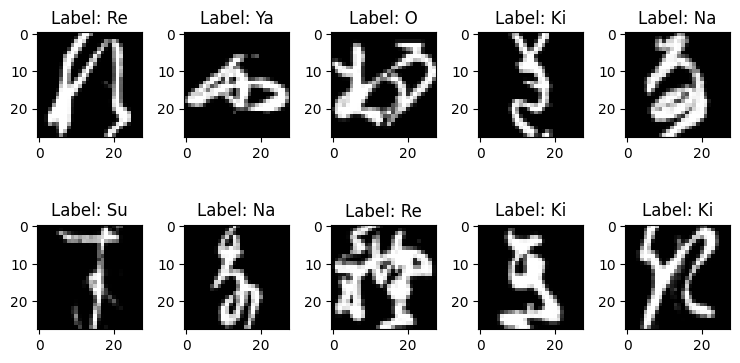

In [5]:
print(list(labels_kanjis.values())[1:])
print(list(labels_read.values())[1:])
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels_read[str(train_labels[i])]))
plt.tight_layout()
plt.show()

De la anterior imagen se obtiene una muestra de ejemplos del dataset KMNIST, que contiene caracteres kanji del hiragana japonés. En cada imagen, se visualiza un carácter junto con su etiqueta correspondiente (label).

Los caracteres están organizados en dos filas con etiquetas asociadas a cada uno, mientras que las etiquetas representan el nombre del kanji, por ejemplo: "Re", "Ya", "O", "Ki", "Na", y "Su".

Cada imagen es en escala de grises y tiene una resolución de 28x28 píxeles. Los caracteres presentan variaciones en su forma, mostrando la diversidad de ejemplos en el dataset.

Esto sugiere que el dataset está bien preparado para entrenar una red neuronal convolucional (CNN) en tareas de clasificación de kanjis.

## 4. Entrenamiento del Modelo

Para entrenar el modelo, aplicaremos la técnica de __One-Hot Encoding__, que transforma las etiquetas en vectores donde solo una posición tiene el valor 1, mientras que las demás son 0. Este formato es necesario porque la salida de la red será un vector que representará la probabilidad de que una imagen corresponda a cada uno de los 10 kanjis. Por lo tanto, también debemos convertir las etiquetas de entrenamiento y prueba a este formato.

In [6]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

La red neuronal está compuesta por tres capas convolucionales, cada una seguida de una capa de pooling para reducir la dimensionalidad y extraer características relevantes. Posteriormente, se incluye una capa densa con 64 neuronas para aprender patrones más complejos, y finalmente una capa de salida con activación softmax, que genera las probabilidades para las 10 clases. El modelo se entrena utilizando el optimizador Adam y la función de pérdida `categorical_crossentropy`, ideal para problemas de clasificación multiclase.

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Una vez asignadas las capas a la red neuronal, procedemos con el entrenamietno del modelo.

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7215 - loss: 1.6703
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9479 - loss: 0.1746
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9693 - loss: 0.0986
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9764 - loss: 0.0735
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9816 - loss: 0.0580


## 5. Evaluación de Resultados

Procedemos a evaluar los resultados obtenidos en el entrenamiento y validación del modelo.

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Precisión en el conjunto de prueba: {test_acc}")
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_labels, axis=1)
print(f'\tPredicciones\t|\tValores reales')
for i in range(5):
    print(f'\t\t{labels_kanjis[str(predictions[i])]}\t|\t{labels_kanjis[str(test_labels[i])]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.2963
Precisión en el conjunto de prueba: 0.9287999868392944
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
	Predicciones	|	Valores reales
		す	|	す
		を	|	を
		つ	|	つ
		れ	|	れ
		つ	|	つ


Los resultados obtenidos muestran un rendimiento muy positivo del modelo, con una <u>precisión (accuracy) de 0.923 en el conjunto de prueba</u>, lo cual refleja que el modelo tiene un alto nivel de acierto y una </u>pérdida (loss) de 0.2963</u>, lo cual lo cual sugiere que el modelo ha aprendido bien, aunque todavía hay margen para mejorar, posiblemente ajustando hiperparámetros o aumentando el número de épocas. 

Esto indica que el modelo es capaz de clasificar correctamente más del 92% de los kanjis en el dataset de prueba.

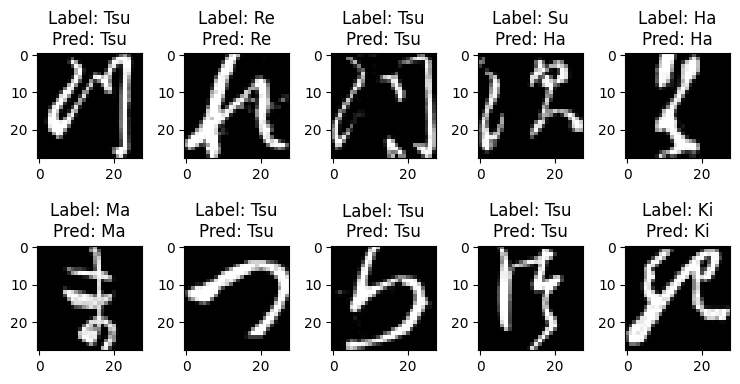

In [10]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images[i+5], cmap='gray')
    ax.set_title('Label: {}\nPred: {}'.format(labels_read[str(test_labels[i+5])], labels_read[str(predictions[i+5])]))
plt.tight_layout()
plt.show()

Por último, finalizamos nuestro artículo analizando los resultados de la matriz de confusión a través de la siguiente gráfica, la cual es una herramienta esencial para evaluar su rendimiento en tareas de clasificación multiclase. En este caso, se utiliza para analizar la capacidad del modelo para clasificar correctamente los 10 caracteres kanji del dataset KMNIST.

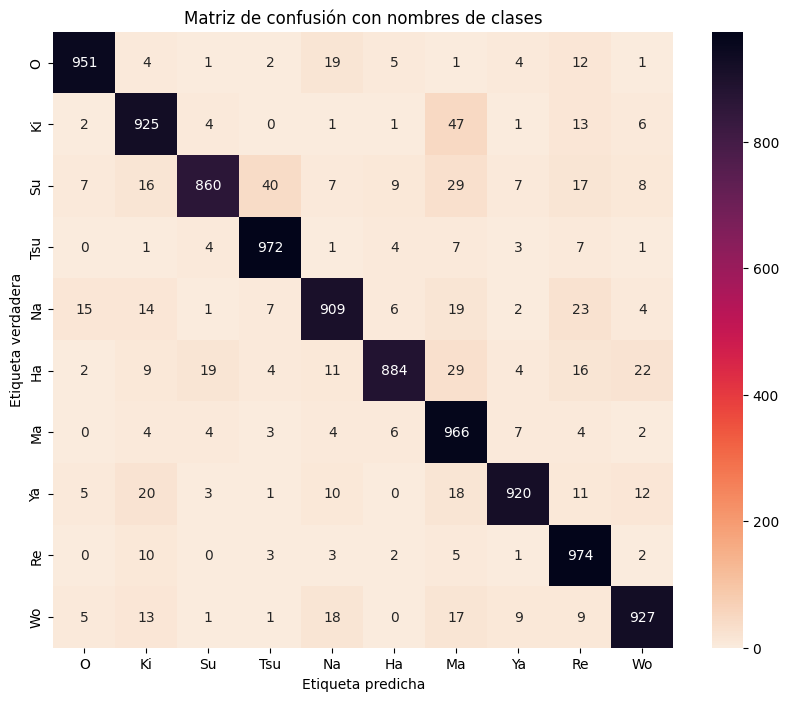

In [11]:
cm = confusion_matrix(test_labels, predictions)

class_names = [labels_read[str(i)] for i in range(10)]  

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.title('Matriz de confusión con nombres de clases')
plt.show()

Conclusiones obtenidas del análisis de la matriz de confusión:

* Diagonal principal: Los valores más altos se encuentran en la diagonal principal, lo que indica que el modelo clasifica correctamente la mayoría de los kanjis. Por ejemplo:
    * La clase "O" tiene 951 clasificaciones correctas.
    * La clase "Tsu" cuenta con 972 clasificaciones correctas.
    * La clase "Re" tiene 974 aciertos, lo que muestra un excelente desempeño en esta clase.

* Errores de clasificación: Algunas confusiones son visibles fuera de la diagonal principal:
    * La clase "Ki" se confunde con la clase "Wo" en 47 ocasiones.
    * La clase "Ha" tiene 29 confusiones con "Na".
    * La clase "Su" presenta 40 errores con "Tsu", lo que puede deberse a características visuales similares entre estos kanjis.

* Rendimiento general: El modelo muestra un buen nivel de precisión, pero es evidente que ciertas clases presentan más dificultades que otras, posiblemente debido a similitudes visuales o limitaciones en los datos de entrenamiento.

La matriz de confusión confirma que el modelo tiene un rendimiento sólido con una alta precisión global, aunque existen algunas áreas de mejora en la diferenciación de ciertos kanjis similares. Ajustar el modelo, incorporar más datos o aplicar técnicas de aumento de datos (data augmentation) podrían mejorar la clasificación en futuras iteraciones.

Por lo tanto, afirmamos que el modelo es bueno y aporta buenos resultados. Sin embargo, es necesario seguir el trabajo entrenandolo de bueno para ir puliendo el rendimiento y seguir mejorando.

Espero que te haya gustado el artículo. 

#### ¡Muchas gracias por leer!